In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

df_hit = pd.read_csv('./data/Hitters.csv')
df_hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [9]:
df_hit.dropna(inplace = True)

In [13]:
df_hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

<AxesSubplot:xlabel='Years', ylabel='Hits'>

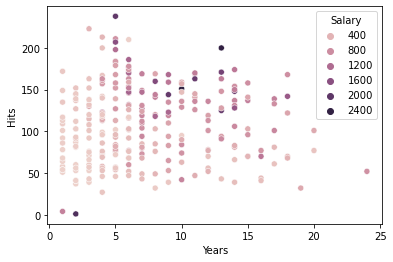

In [12]:
sns.scatterplot(data= df_hit, x = 'Years', y = 'Hits', hue = 'Salary')

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

model_tree_regression = DecisionTreeRegressor(max_depth=2)

X, y = df_hit[["Years", "Hits"]], df_hit["Salary"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((210, 2), (53, 2))

<AxesSubplot:xlabel='Years', ylabel='Hits'>

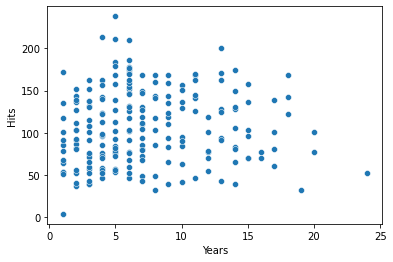

In [17]:
sns.scatterplot(data = X_train, x = "Years", y = "Hits")

In [23]:
model_tree_regression.fit(X_train, y_train)
model_tree_regression.feature_importances_, model_tree_regression.feature_names_in_

(array([0.58742156, 0.41257844]), array(['Years', 'Hits'], dtype=object))

[Text(0.5, 0.8333333333333334, 'Years <= 4.5\nsamples = 210\nvalue = 543.665'),
 Text(0.25, 0.5, 'Years <= 3.5\nsamples = 70\nvalue = 203.836'),
 Text(0.125, 0.16666666666666666, 'samples = 51\nvalue = 151.098'),
 Text(0.375, 0.16666666666666666, 'samples = 19\nvalue = 345.395'),
 Text(0.75, 0.5, 'Hits <= 117.5\nsamples = 140\nvalue = 713.579'),
 Text(0.625, 0.16666666666666666, 'samples = 73\nvalue = 472.251'),
 Text(0.875, 0.16666666666666666, 'samples = 67\nvalue = 976.518')]

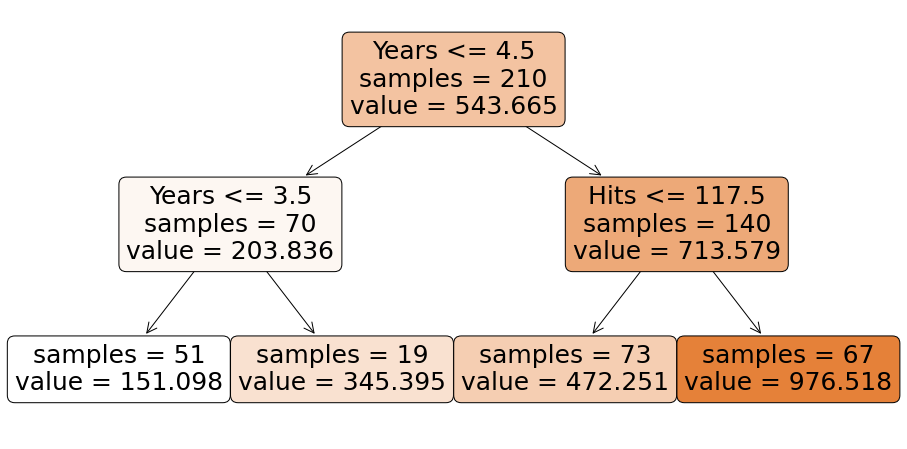

In [28]:
from sklearn import tree

fig, ax = plt.figure(figsize = (16,8)), plt.axes()

tree.plot_tree(model_tree_regression, filled = True, ax = ax, feature_names= X.columns, impurity = False, rounded = True)

In [29]:
print(tree.export_text(model_tree_regression, feature_names = list(X.columns)))

|--- Years <= 4.50
|   |--- Years <= 3.50
|   |   |--- value: [151.10]
|   |--- Years >  3.50
|   |   |--- value: [345.39]
|--- Years >  4.50
|   |--- Hits <= 117.50
|   |   |--- value: [472.25]
|   |--- Hits >  117.50
|   |   |--- value: [976.52]



In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model_tree_regression.predict(X_test)
mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))


(235.00675815373418, 379.69119483603174)

In [35]:
df_default = pd.read_csv('./data/Default.csv')
df_default_encoded = pd.get_dummies(df_default, drop_first= True)
df_default_encoded.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [38]:
X, y = df_default_encoded.drop('default_Yes', axis = 1), df_default_encoded['default_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(8000, 3)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.34      0.30      0.32        69

    accuracy                           0.96      2000
   macro avg       0.66      0.64      0.65      2000
weighted avg       0.95      0.96      0.95      2000



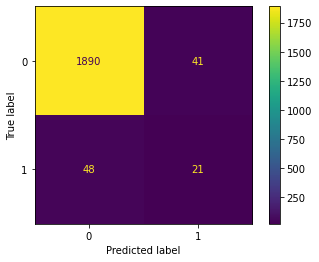

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()